<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Insurance Fraud Detection</strong></p>

## Table of Contents
1. [Introduction](#Introduction)
2. [Importing Libraries](#Importing-Libraries)
3. [Loading and Exploring Data](#Loading-and-Exploring-Data)
4. [Visualizing Missing Values](#Visualizing-Missing-Values)
5. [Handling Missing Values](#Handling-Missing-Values)
6. [Encoding Categorical Variables](#Encoding-Categorical-Variables)
7. [Feature Scaling](#Feature-Scaling)
8. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
    1. [Boxplot Visualization](#Boxplot-Visualization)
    2. [Feature Distribution](#Feature-Distribution)
9. [Splitting Data into Training and Test Set](#Splitting-Data-into-Training-and-Test-Set)
10. [Building Predictive Models](#Building-Predictive-Models)
    1. [Support Vector Classifier (SVC)](#Support-Vector-Classifier)
    2. [K-Nearest Neighbors (KNN)](#K-Nearest-Neighbors)
    3. [Decision Tree Classifier](#Decision-Tree-Classifier)
    4. [Random Forest Classifier](#Random-Forest-Classifier)
    5. [AdaBoost Classifier](#AdaBoost-Classifier)
    6. [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
11. [Model Evaluation](#Model-Evaluation)

## Introduction
Insurance fraud is a major challenge in the insurance industry, where fraudulent claims lead to significant financial losses. Detecting fraud using machine learning involves analyzing historical claims data and identifying patterns that may indicate fraudulent behavior. In this notebook, we will walk through the steps of importing data, cleaning, visualizing, and building predictive models to detect insurance fraud.



# Importing Libraries

To start the analysis, we import essential libraries for data manipulation, visualization, and building machine learning models:

- Pandas for data manipulation
- Numpy for numerical operations
- Matplotlib and Seaborn for data visualization
- Missingno for visualizing missing values
- Scikit-learn for machine learning operations

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading and Exploring Data
We begin by loading the insurance claims dataset and performing a quick overview to understand its structure, data types, and summary statistics.

Steps Taken:

- Load the data using pandas and display the first few rows.
- Generate basic descriptive statistics using describe().
- Check the data types and missing values using info().

In [2]:
# Load the dataset
df = pd.read_excel('insurance_claims_raw.xlsx')

In [4]:
# Display the first few rows of the dataframe
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


The dataset provides a rich set of features to identify potential fraud in insurance claims. For example, high claim amounts, missing police reports, short customer histories, and inconsistencies in injury/property/vehicle claims could be potential indicators of fraud.


In [5]:
# Data Overview
print("Data Description:")
df.describe()

Data Description:


,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,...,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,998.000000,1000.000000,1000,998.000000,997.000000,1.000000e+03,1000.000000,998.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,996.000000,999.000000,999.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.962926,546238.648000,2002-02-08 04:40:47.999999872,1134.268537,1257.001113,1.101000e+06,501214.488000,25176.452906,-26793.700000,...,11.644000,1.83900,0.992000,1.487000,52767.469880,7434.944945,7398.628629,37928.950000,2005.103000,NaN
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,...,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1090.320000,0.000000e+00,448404.500000,0.000000,-51500.000000,...,6.000000,1.00000,0.000000,1.000000,41812.500000,4290.000000,4440.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.830000,0.000000e+00,466445.500000,0.000000,-23250.000000,...,12.000000,1.00000,1.000000,1.000000,57935.000000,6780.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.740000,0.000000e+00,603251.000000,51075.000000,0.000000,...,17.000000,3.00000,2.000000,2.000000,70620.000000,11310.000000,10890.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,...,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,NaN
std,115.113174,9.135425,257063.005276,NaN,611.251914,244.265051,2.297407e+06,71701.610941,27877.379027,28104.096686,...,6.951373,1.01888,0.820127,1.111335,26405.348039,4883.158265,4827.050887,18886.252893,6.015861,NaN


This dataset contains a variety of information related to insurance claims, customer demographics, and vehicle details. There is significant variability in the data, especially in terms of claim amounts, policy limits, and vehicle involvement. The data could be useful for predictive modeling, particularly for detecting fraudulent claims or estimating the likelihood of high-cost claims based on customer and incident characteristics.

In [6]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          998 non-null    float64       
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            998 non-null    float64       
 7   policy_annual_premium        997 non-null    float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      999

Overall, while most of the data is complete and well-structured, addressing the missing values and potentially irrelevant columns is essential for ensuring clean and reliable analysis.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('insurance_claims_raw.xlsx')

# Define the fraud_suspicion function
def fraud_suspicion(row):
    # Condition 1: High total claim amount (above 75th percentile)
    high_claim = row['total_claim_amount'] > df['total_claim_amount'].quantile(0.75)
    
    # Condition 2: Police report not available
    no_police_report = row['police_report_available'] == 'NO'
    
    # Condition 3: Inconsistent injury and property claims (injury much higher than property)
    inconsistent_claims = row['injury_claim'] > (row['property_claim'] * 2)
    
    # Condition 4: High witness count (3 or more)
    high_witness_count = row['witnesses'] >= 3
    
    # Combine the conditions to flag potential fraud suspicion
    if high_claim or no_police_report or inconsistent_claims or high_witness_count:
        return 1  # Suspicious
    else:
        return 0  # Not suspicious

# Apply the function to create the new feature
df['fraud_suspicion'] = df.apply(fraud_suspicion, axis=1)

# Check the distribution of the new feature
print(df['fraud_suspicion'].value_counts())

# Set the aesthetic style of the plots
sns.set(style="whitegrid")



fraud_suspicion
1    651
0    349
Name: count, dtype: int64


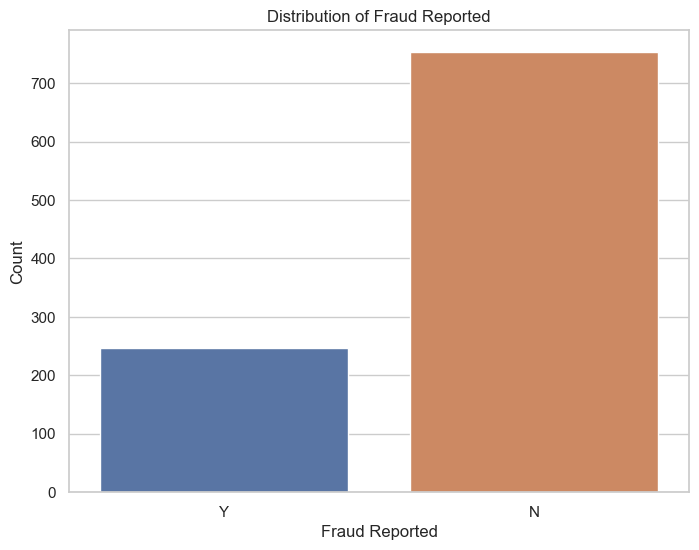

In [6]:
# Count plot for fraud reported (target variable)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='fraud_reported')
plt.title('Distribution of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()



C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ntulithabang\OneDrive\thabang.exp

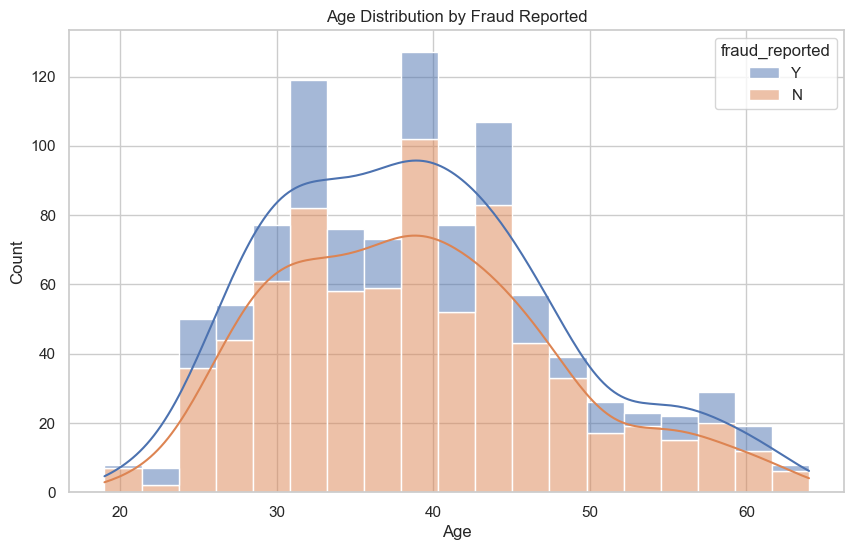

In [7]:
# Analyzing the relationship between age and fraud reporting
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='fraud_reported', kde=True, multiple='stack')
plt.title('Age Distribution by Fraud Reported')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



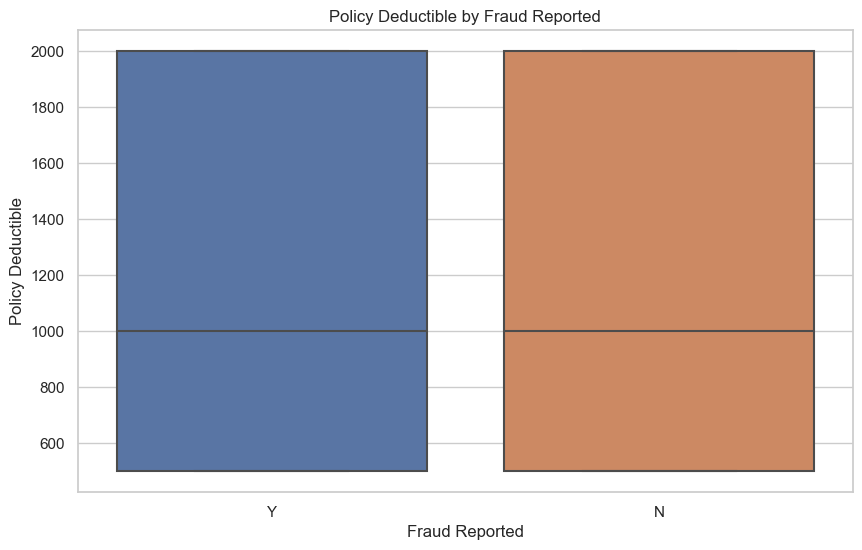

In [8]:
# Visualizing the policy deductible by fraud reporting
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='fraud_reported', y='policy_deductable')
plt.title('Policy Deductible by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Policy Deductible')
plt.show()

# Handling Missing Values
Handling missing data is crucial for ensuring model accuracy. In this step, we:

- Visualize missing values using missingno.
- Replace missing categorical values using the mode. 

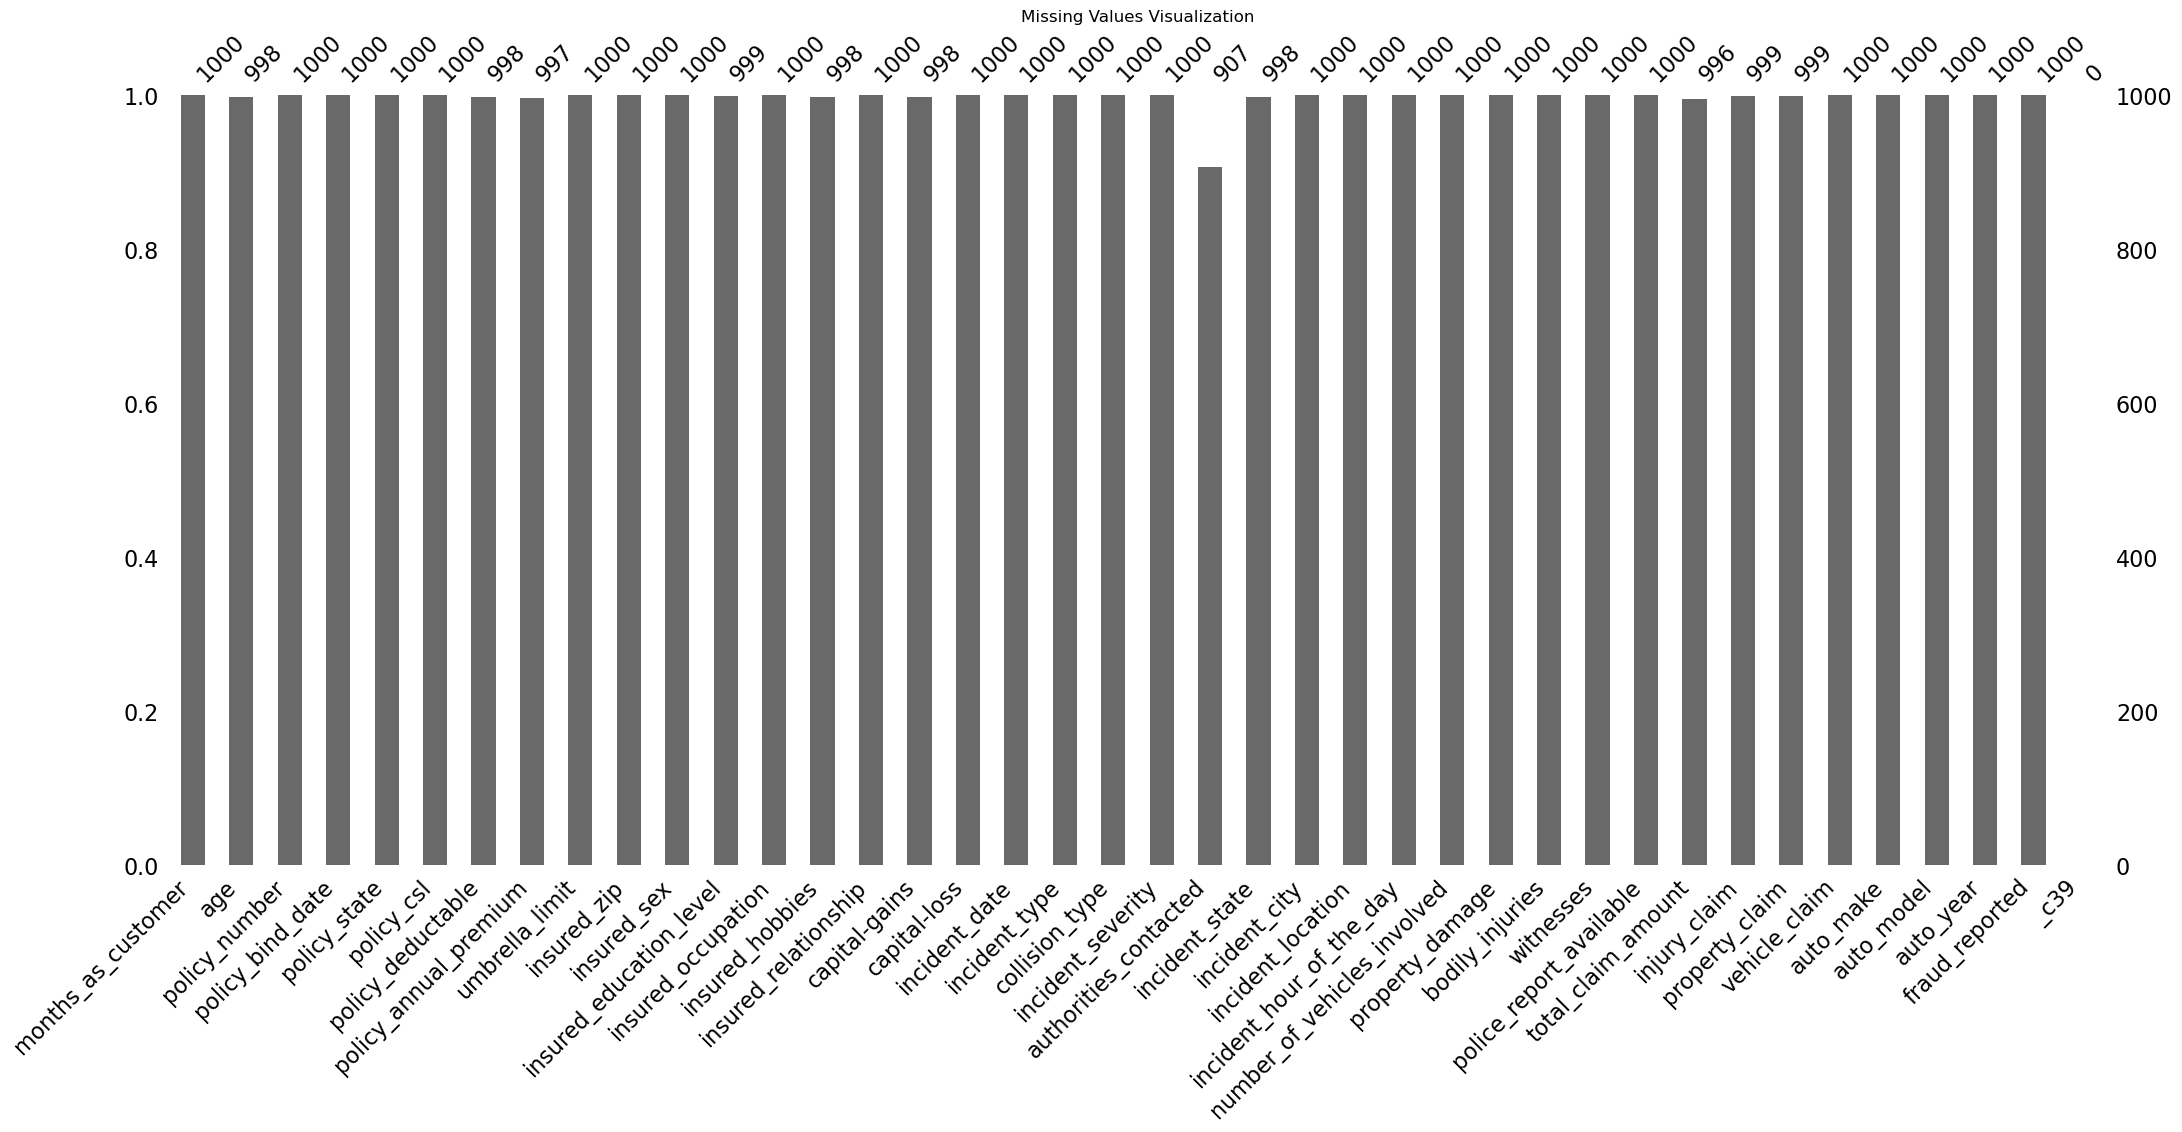

In [8]:
# Visualizing Missing Values
msno.bar(df)
plt.title("Missing Values Visualization")
plt.show()

In [9]:
# Handling Missing Values
df.replace('?', np.nan, inplace=True)

In [10]:
# Fill missing values for categorical columns
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])


In [11]:
df.isna().sum()


months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            93
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The dataset has a few missing values spread across multiple columns, with the most notable issue being the large number of missing entries in authorities_contacted. This column might require special treatment, while the other missing data can be handled using common data-cleaning techniques.

# Feature Engineering and Data Cleaning
This step involves cleaning and preparing the dataset for machine learning:

- Dropping irrelevant columns.
- Encoding categorical variables.
- Checking for multicollinearity and dropping highly correlated features.

In [12]:
# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')


In [13]:
# Drop non-numeric columns
df_numeric = df.drop(non_numeric_columns, axis=1)

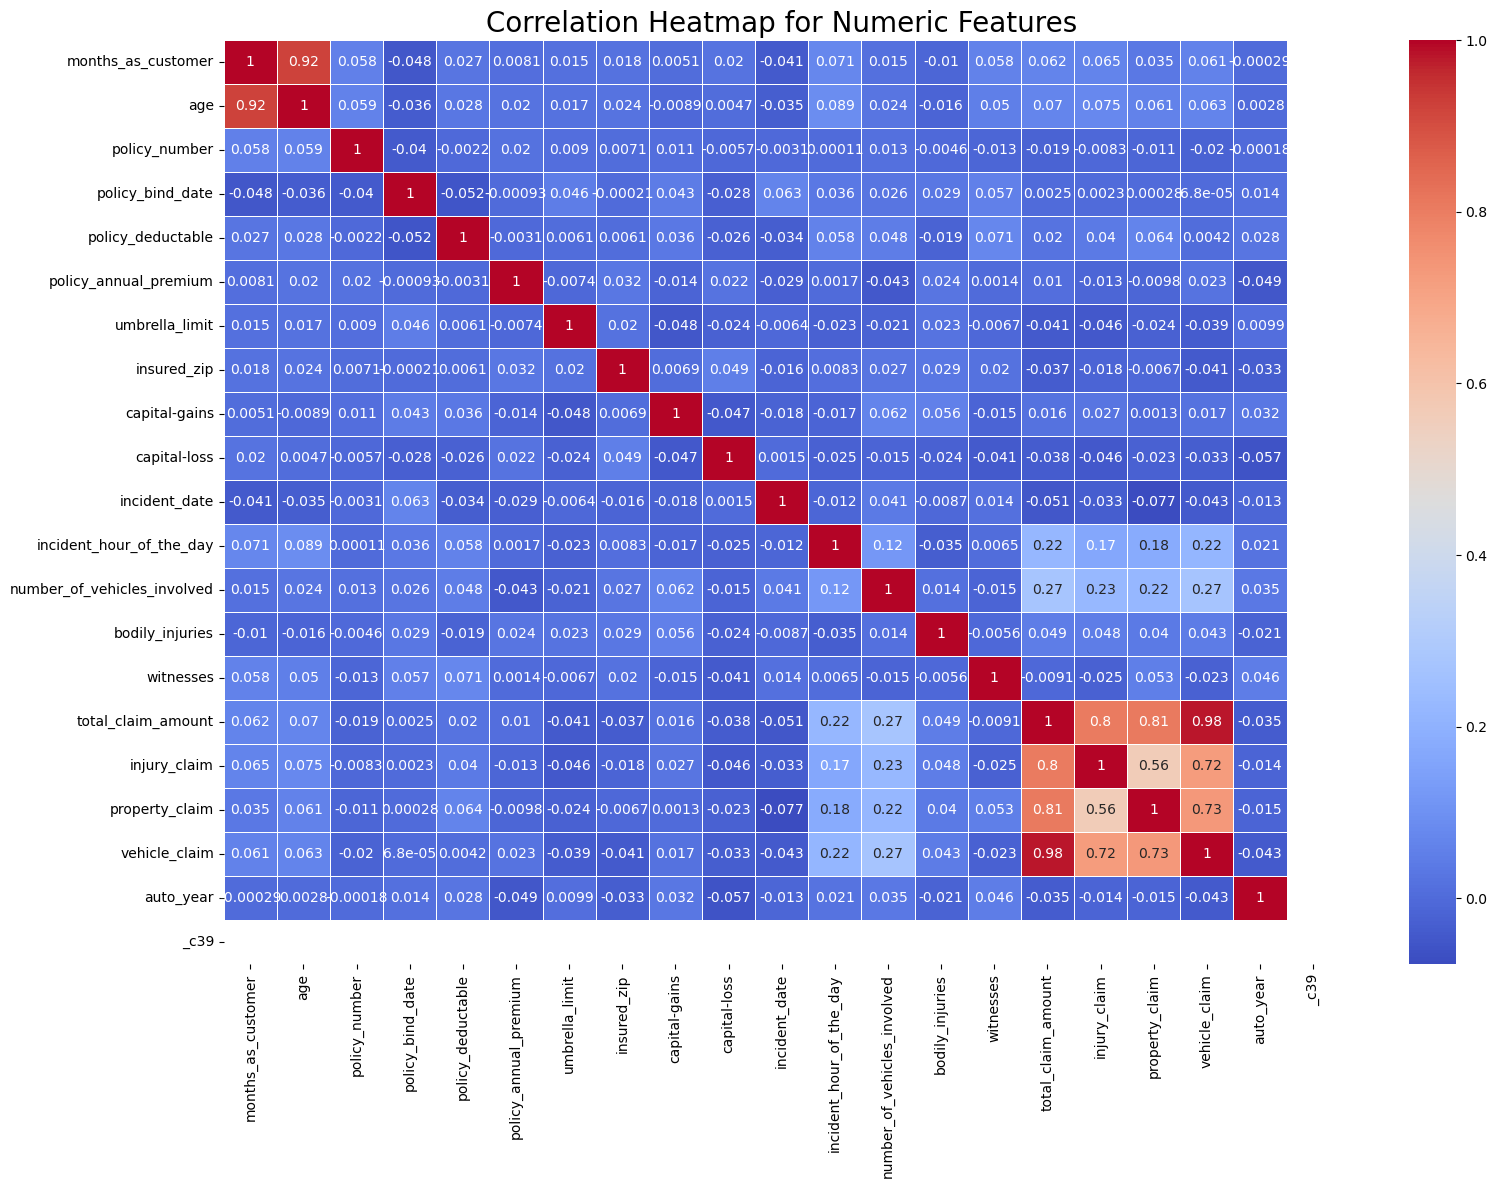

In [14]:
# Correlation Heatmap for Numeric Features
plt.figure(figsize=(18, 12))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features', fontsize=20)
plt.show()

The heatmap helps identify relationships between features. The most notable correlation is between different types of claims (e.g., injury, property) and the total claim amount. There's also a strong connection between age and how long a customer has been with the company.

In [15]:
# Drop unnecessary columns
to_drop = ['policy_number', 'policy_bind_date', 'policy_state', 'insured_zip', 
           'incident_location', 'incident_date', 'incident_state', 'incident_city', 
           'insured_hobbies', 'auto_make', 'auto_model', 'auto_year', '_c39']
df.drop(to_drop, inplace=True, axis=1)


In [16]:
# Check the remaining columns and their types
print("Remaining DataFrame columns and their types:")
print(df.dtypes)

Remaining DataFrame columns and their types:
months_as_customer               int64
age                            float64
policy_csl                      object
policy_deductable              float64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_relationship            object
capital-gains                  float64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount             float64
injury_claim                   float64
property_claim     

In [17]:
# Ensure only numeric columns are selected for correlation
df_numeric = df.select_dtypes(include=[np.number])

In [18]:
# Dropping correlated features
df.drop(columns=['age', 'total_claim_amount'], inplace=True)

In [19]:
# Separating features and target variable
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']


In [20]:
# Encoding Categorical Columns
cat_df = X.select_dtypes(include=['object'])
cat_df = pd.get_dummies(cat_df, drop_first=True)

num_df = X.select_dtypes(include=['int64'])
X = pd.concat([num_df, cat_df], axis=1)

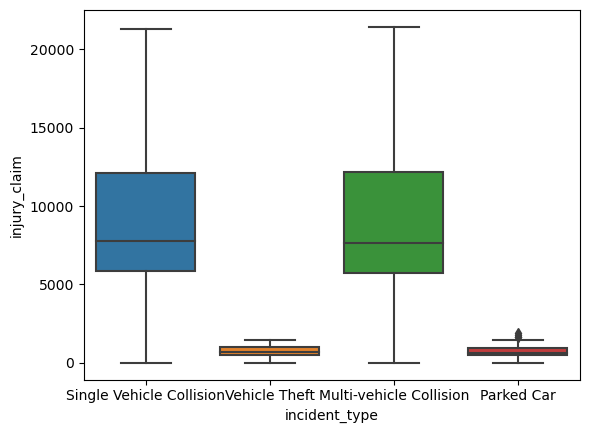

In [22]:
# Dropping correlated features
df.drop(columns=['age', 'total_claim_amount'], inplace=True)

# Separating features and target variable
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

# Encoding Categorical Columns
cat_df = X.select_dtypes(include=['object'])
cat_df = pd.get_dummies(cat_df, drop_first=True)

num_df = X.select_dtypes(include=['int64'])
X = pd.concat([num_df, cat_df], axis=1)

# Example visualization (replace 'your_x_column' and 'your_y_column' with actual column names)
sns.boxplot(data=df, x='incident_type', y='injury_claim')  # Adjust column names as needed
plt.show()

# Data Visualization
We perform various visualizations to understand the distribution of features and their relationships:

- Boxplots for numeric features.
- Correlation heatmaps to identify multicollinearity.

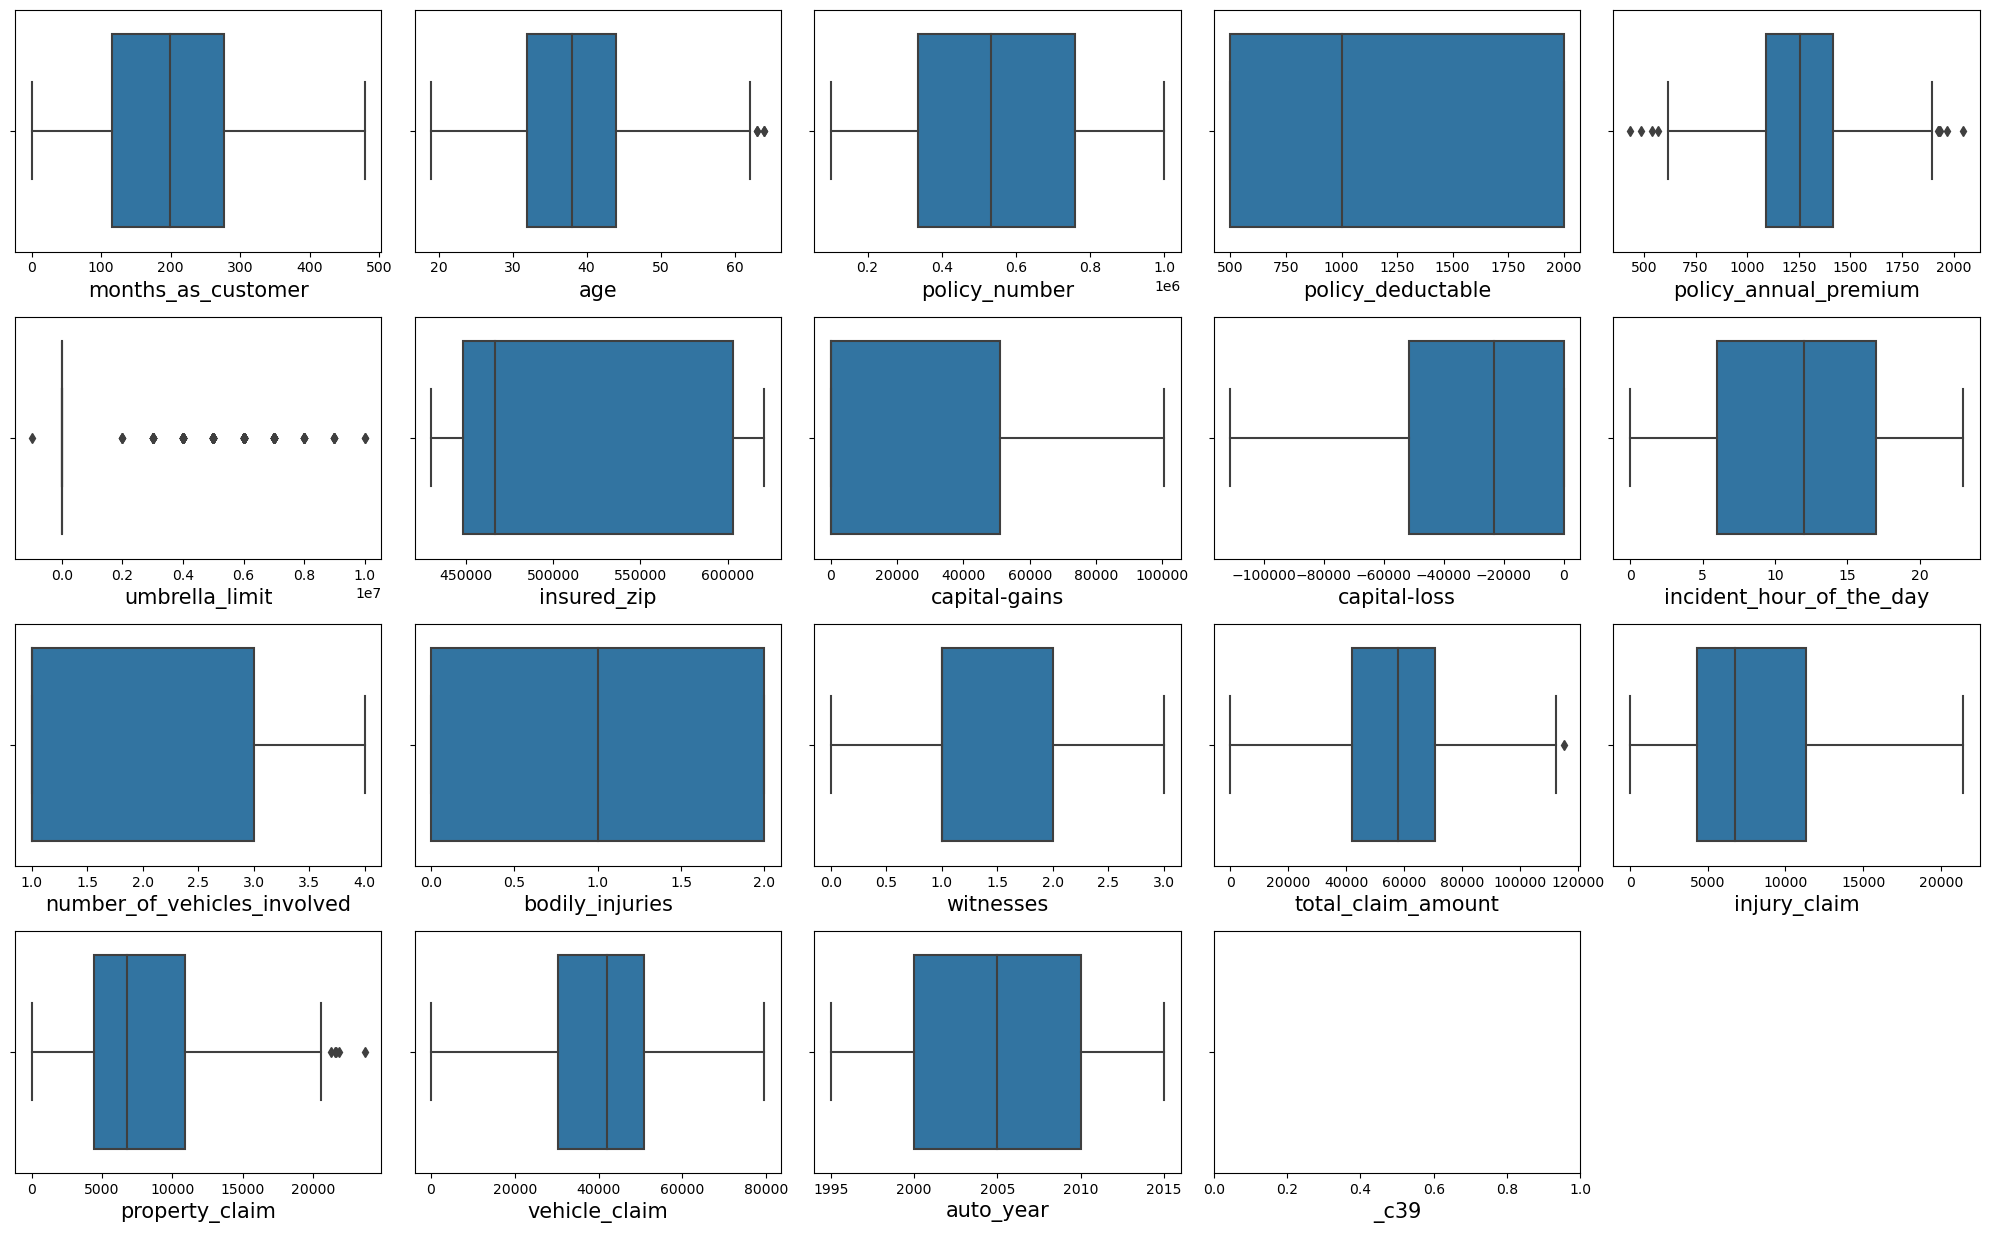

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel('insurance_claims_raw.xlsx')

# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace 'your_x_column' and 'your_y_column' with actual column names
# If you want to create boxplots for each numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Create boxplots for each numeric column
plt.figure(figsize=(20, 15))
for plotnumber, col in enumerate(numeric_columns, 1):
    ax = plt.subplot(5, 5, plotnumber)
    sns.boxplot(x=df[col], ax=ax)
    plt.xlabel(col, fontsize=15)
plt.tight_layout()
plt.show()


C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\ntulithabang\OneDrive\thabang.explore\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf val

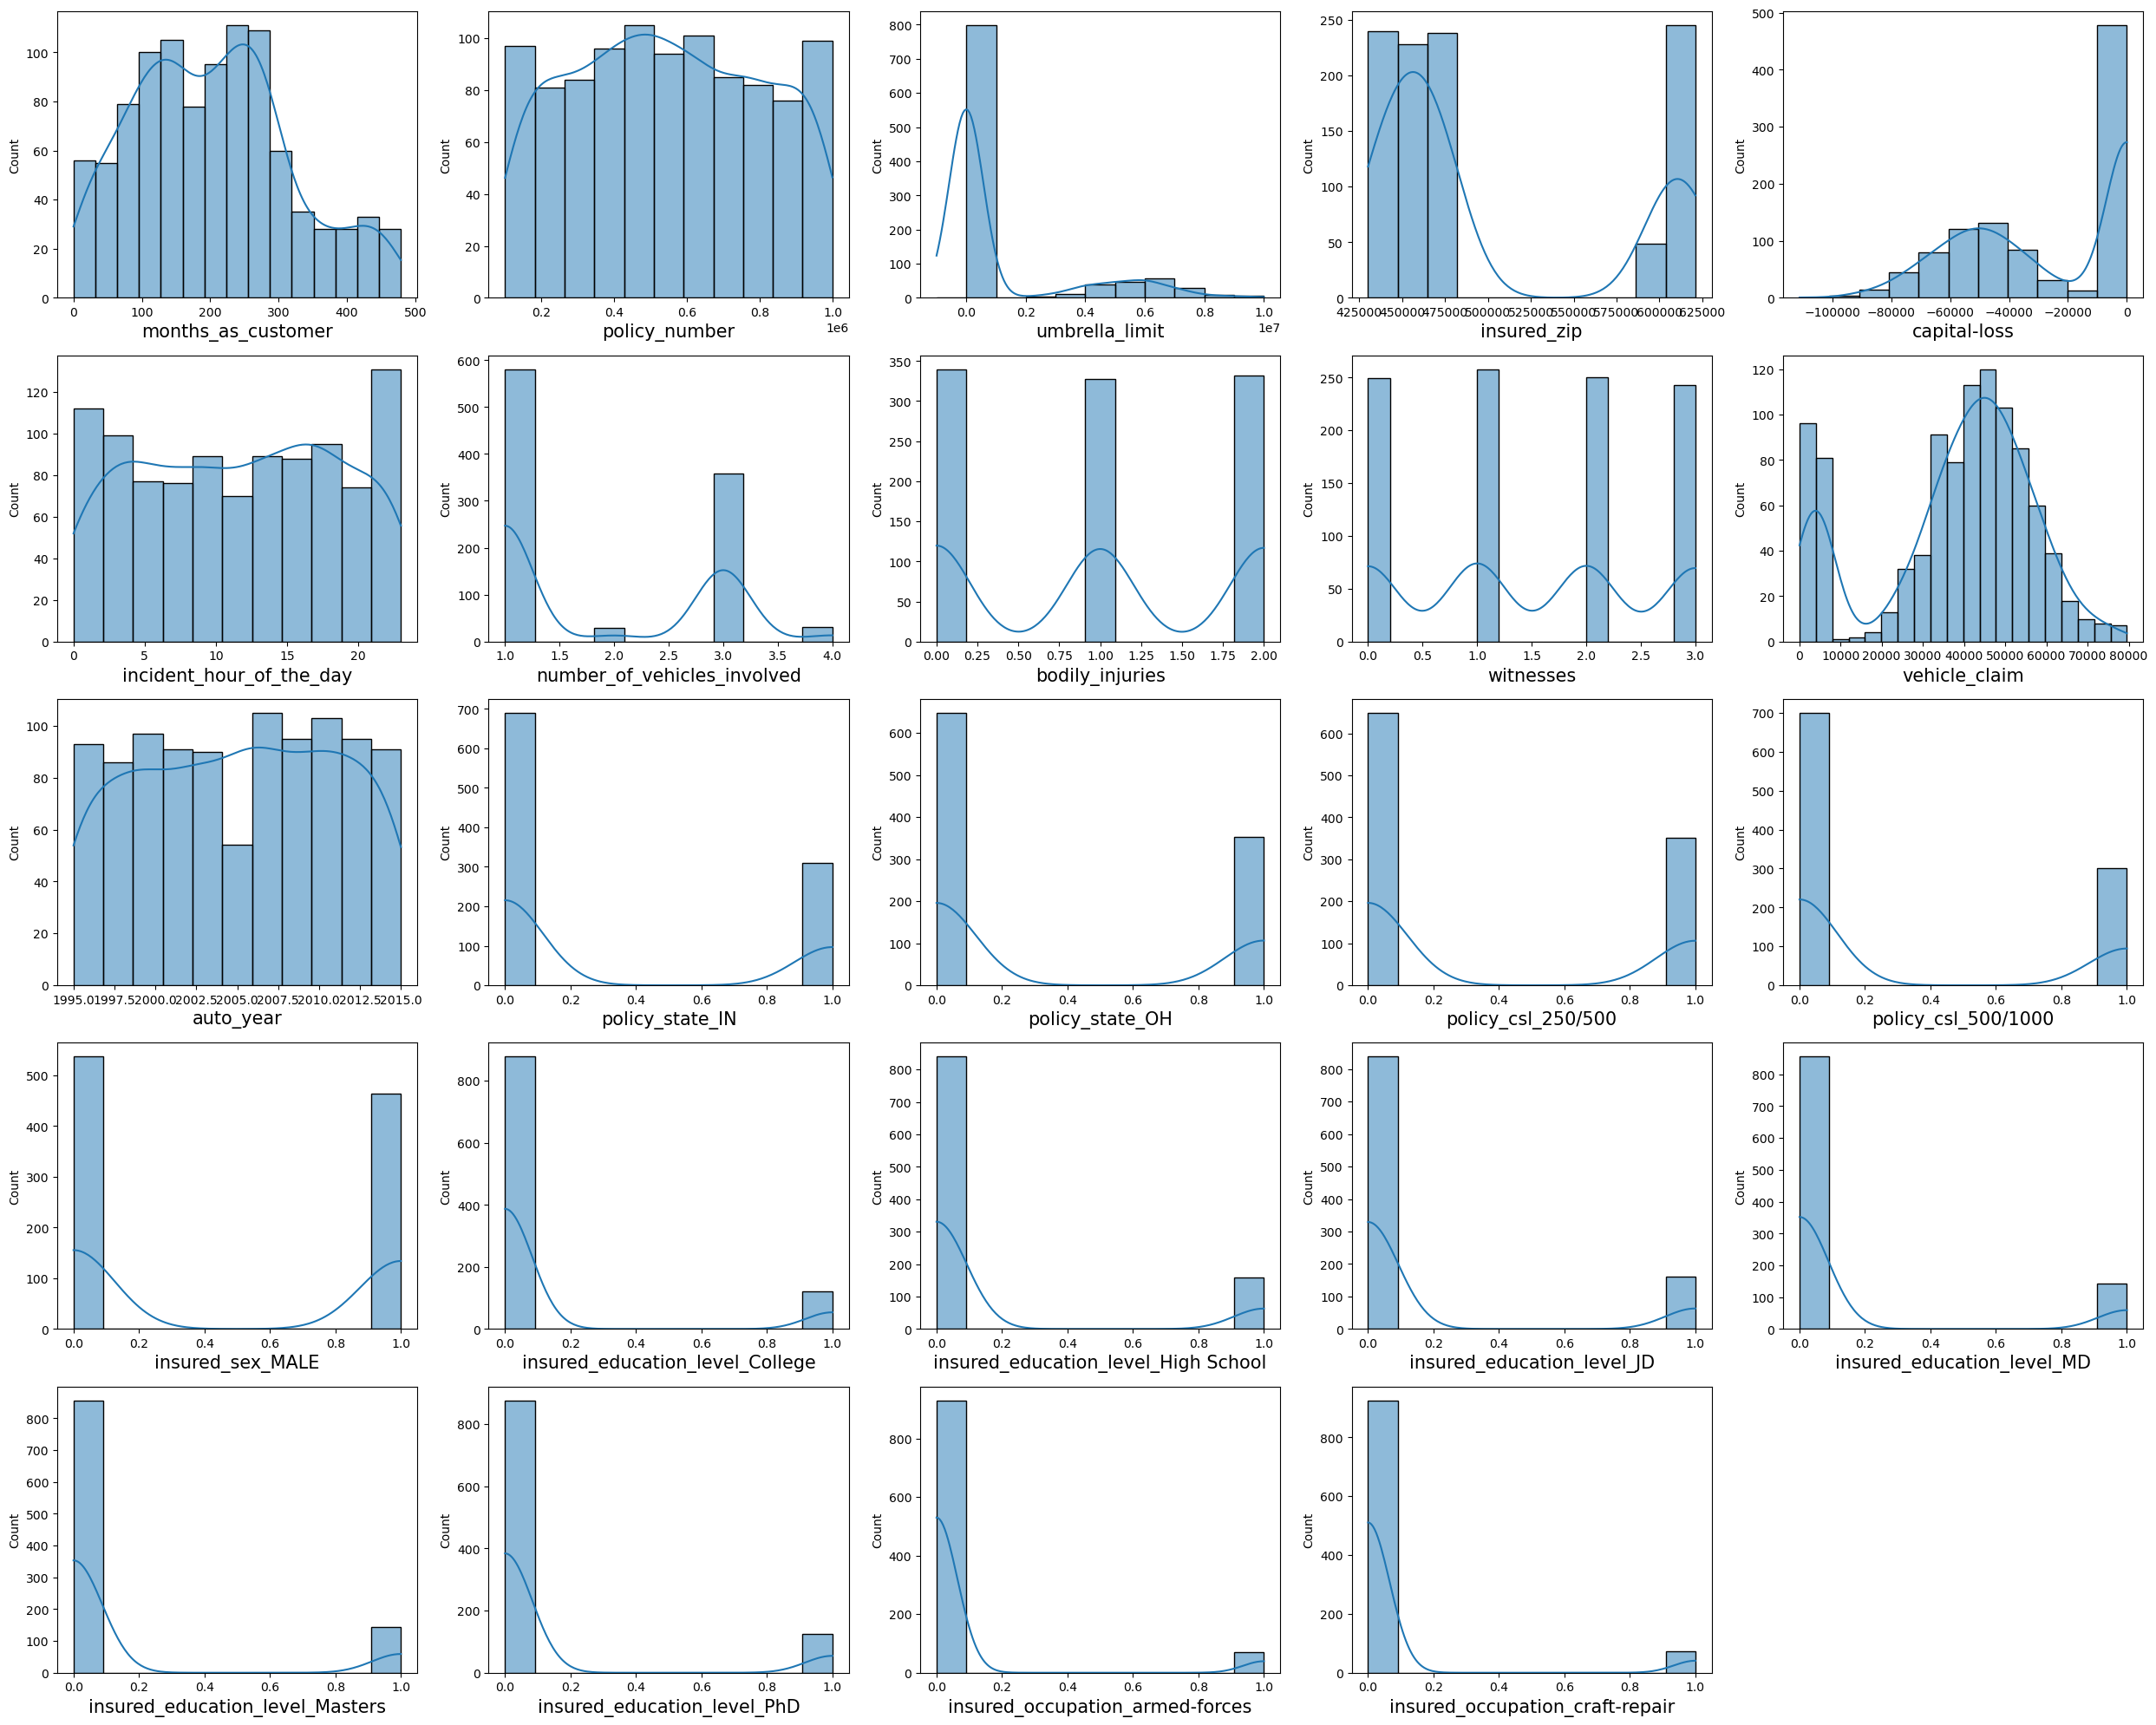

In [23]:
# Check distribution of features
plt.figure(figsize=(25, 20))
plotnumber = 1
for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.histplot(X[col], kde=True)
        plt.xlabel(col, fontsize=15)
    plotnumber += 1
plt.tight_layout()
plt.show()

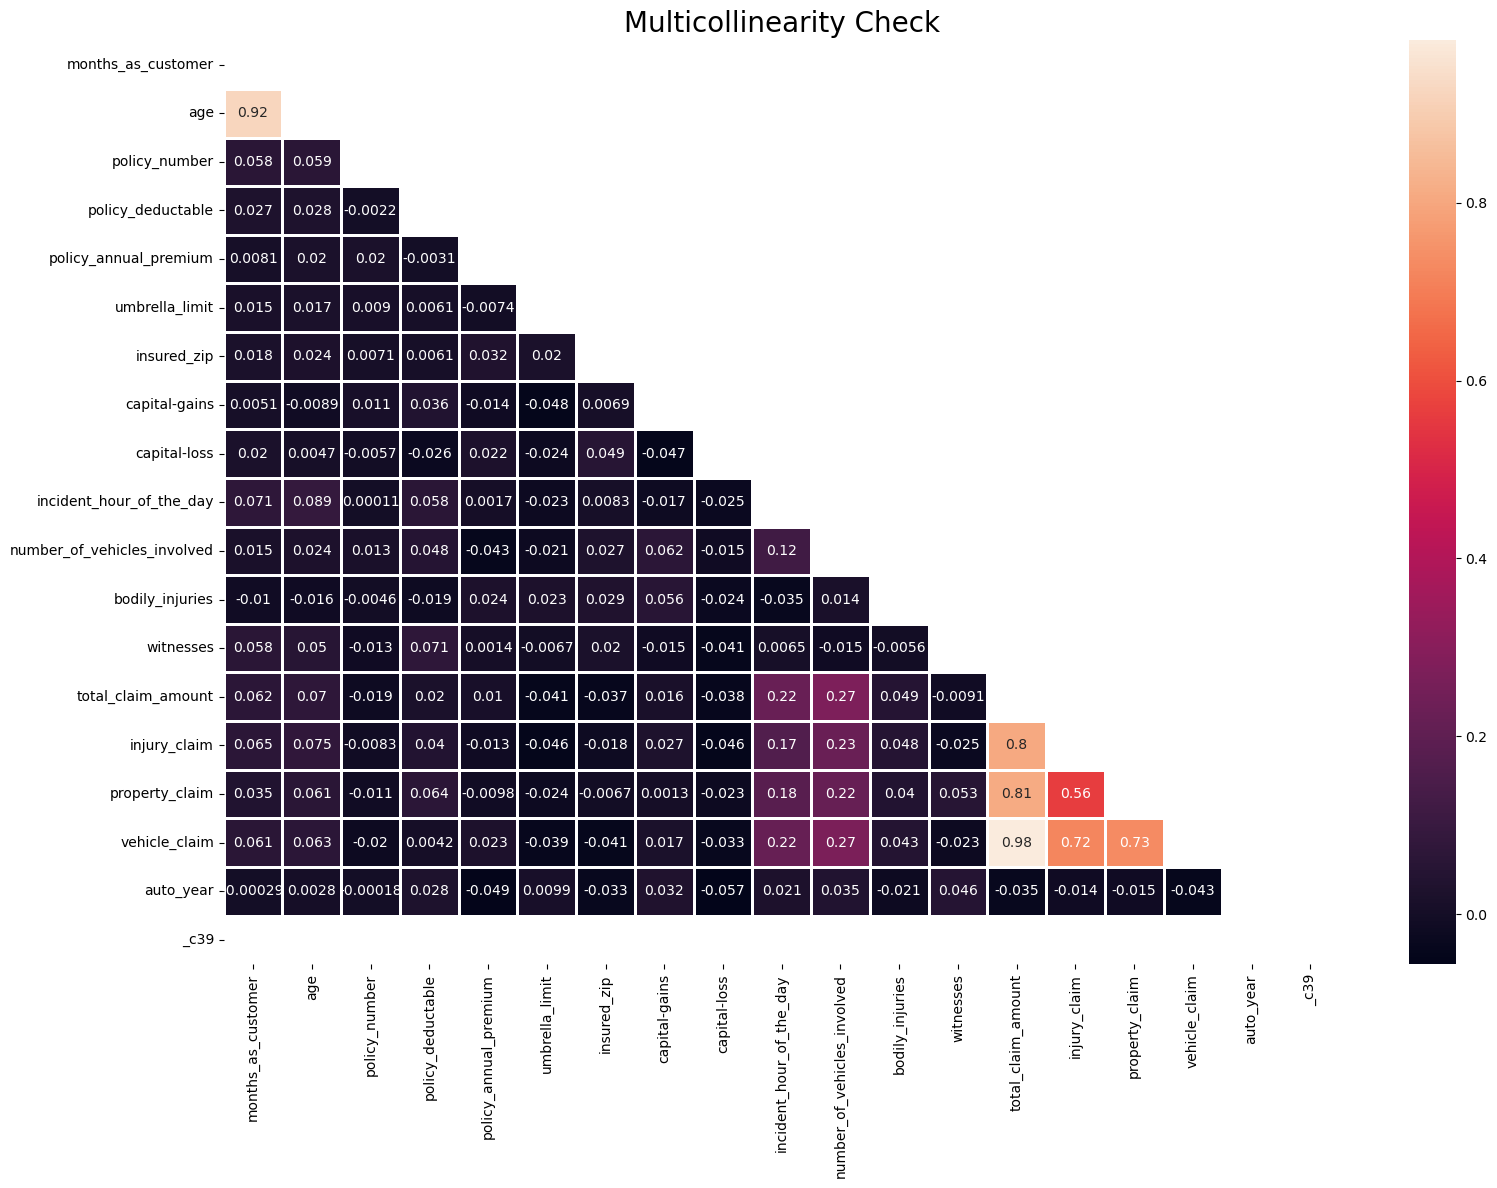

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel('insurance_claims_raw.xlsx')

# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Identify boolean columns in your DataFrame
boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()

# Convert boolean columns to categorical if any exist
for col in boolean_columns:
    df[col] = df[col].astype('category')

# Ensure only numeric columns are selected for correlation
df_numeric = df.select_dtypes(include=[np.number])

# Check for multicollinearity after cleaning
plt.figure(figsize=(18, 12))
corr = df_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2g', linewidth=1)
plt.title('Multicollinearity Check', fontsize=20)
plt.show()



From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [41]:
print(X.dtypes)


months_as_customer     int64
policy_number          int64
umbrella_limit         int64
insured_zip            int64
capital-loss           int64
                       ...  
auto_model_Tahoe        bool
auto_model_Ultima       bool
auto_model_Wrangler     bool
auto_model_X5           bool
auto_model_X6           bool
Length: 1137, dtype: object


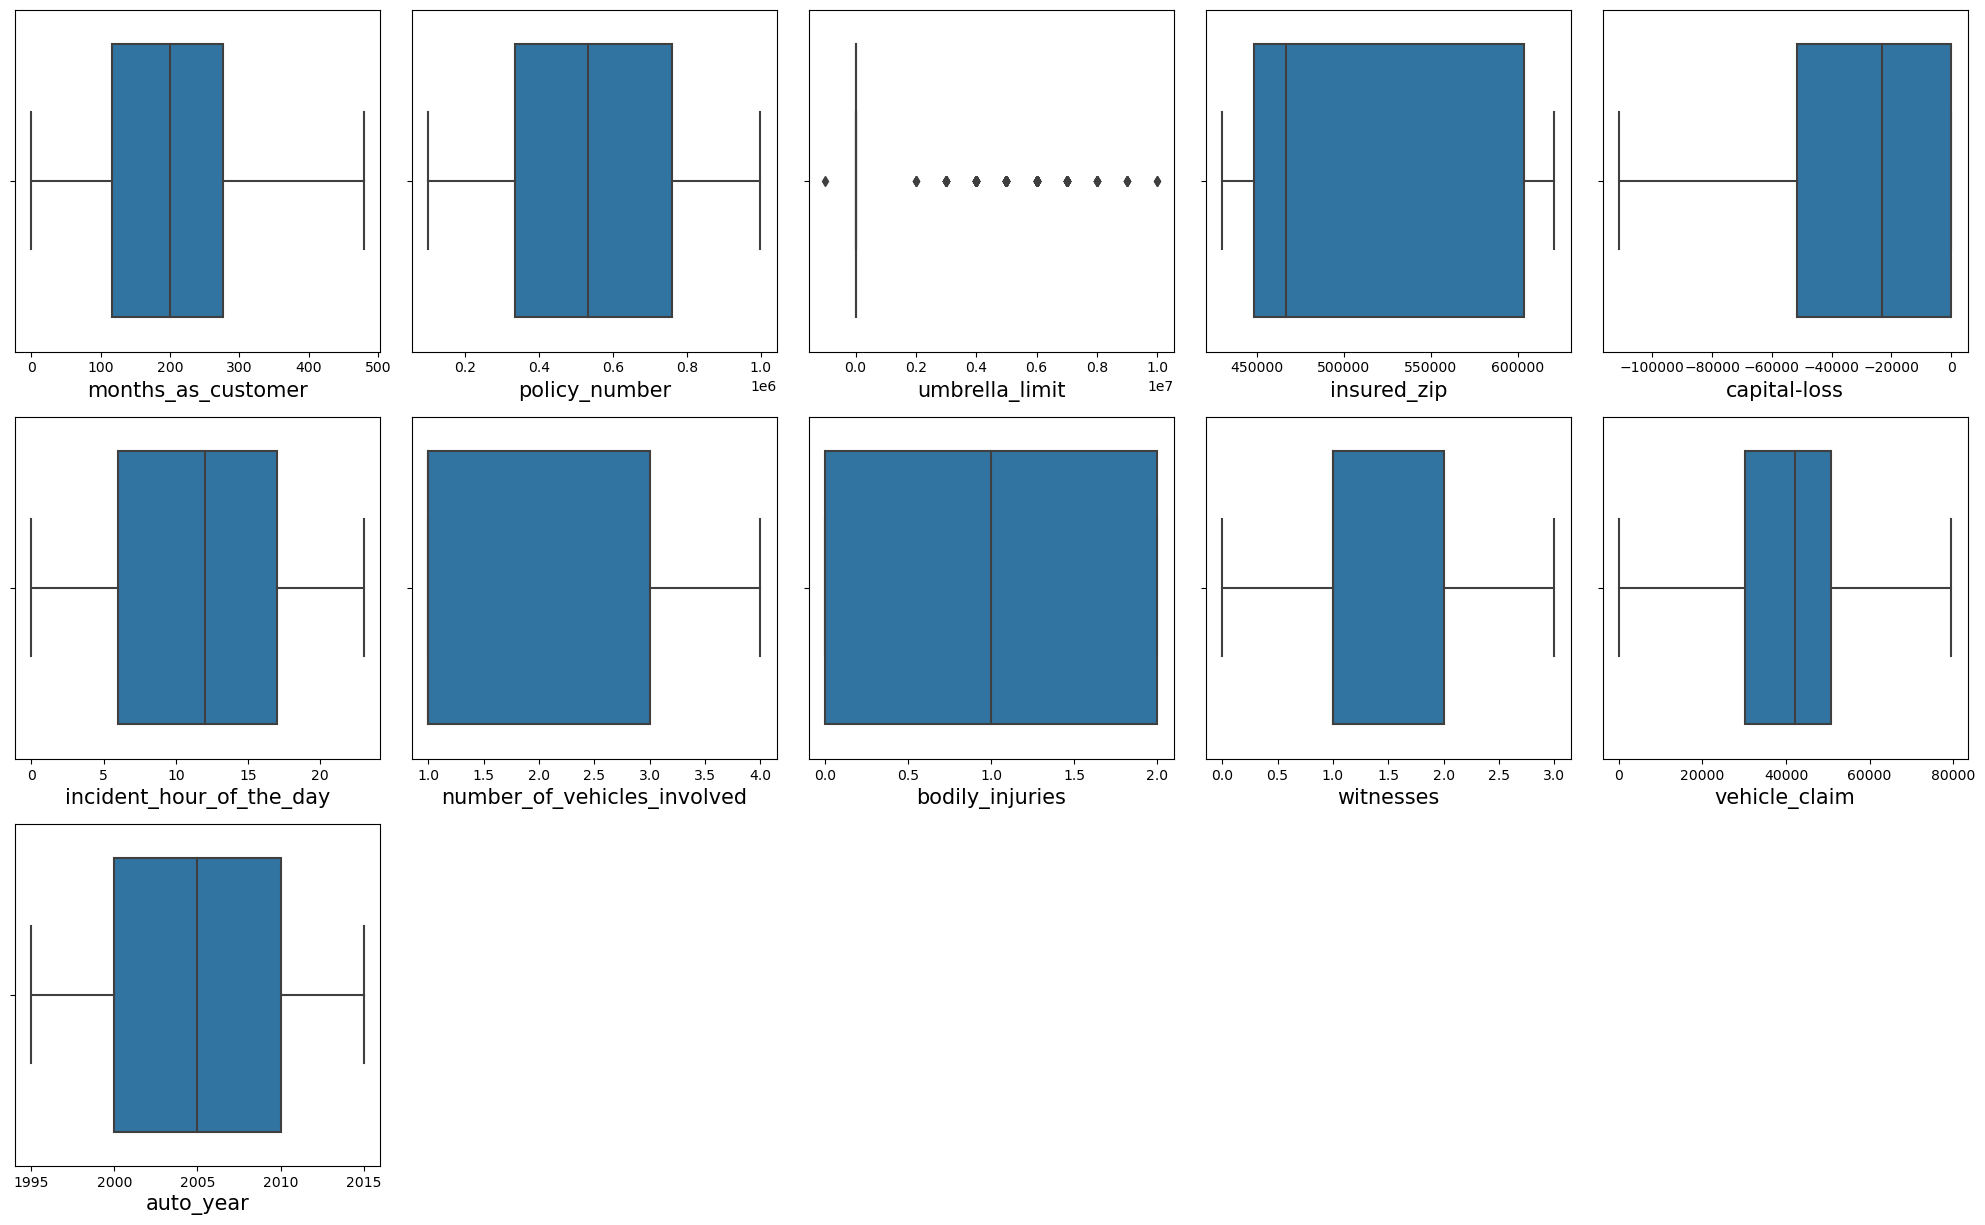

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(20, 20))
plotnumber = 1

# Loop through the columns of the DataFrame
for col in X.select_dtypes(include=['int64', 'float64']).columns:  # Select only numeric columns
    if plotnumber <= 25:  # Limit to first 25 plots
        ax = plt.subplot(5, 5, plotnumber)  # Create a subplot
        sns.boxplot(x=X[col])  # Create the boxplot
        plt.xlabel(col, fontsize=15)  # Label the x-axis
    plotnumber += 1

plt.tight_layout()  # Adjust spacing between plots
plt.show()  # Display the plots


# Data Preprocessing
To prepare the data for modeling, we split the dataset into features (X) and the target variable (y), then:

- Encode categorical features.
- Scale numeric features using StandardScaler.

In [43]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
# Scaling the numeric values in the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=scaled_data, columns=X_train.columns, index=X_train.index)

# Model Building
In this section, we build and evaluate multiple classifiers to detect fraud. The following models are trained:

- Support Vector Classifier (SVC)
- K-Nearest Neighbors (KNN)
- Decision Tree Classifier
- Random Forest Classifier
- AdaBoost Classifier
- Gradient Boosting Classifier

In [29]:
# Building Predictive Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

## Support Vector Classifier (SVC)

In [30]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


## K-Nearest Neighbors Classifier

In [31]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


## Decision Tree Classifier

In [32]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

## Random Forest Classifier

In [33]:
# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=100)
rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)



## Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a decision tree classifier as the base estimator
dtc = DecisionTreeClassifier()

# Initialize the AdaBoost classifier (correct argument name)
ada = AdaBoostClassifier(estimator=dtc, n_estimators=100, algorithm='SAMME')

# Fit the model
ada.fit(X_train, y_train)

# Make predictions
y_pred = ada.predict(X_test)

In [35]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# Evaluation of Models
After building the models, we evaluate them using:

- Accuracy Score: Measures the percentage of correctly predicted fraud cases.
- Confusion Matrix: A detailed breakdown of true/false positives and negatives.
- Classification Report: Includes precision, recall, and F1-score.

In [36]:
print("Support Vector Classifier:")
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Support Vector Classifier:
Test accuracy: 0.7
[[141  42]
 [ 33  34]]
              precision    recall  f1-score   support

           N       0.81      0.77      0.79       183
           Y       0.45      0.51      0.48        67

    accuracy                           0.70       250
   macro avg       0.63      0.64      0.63       250
weighted avg       0.71      0.70      0.71       250



Insight: The model performs decently with an overall accuracy of 70%, but its precision and recall for detecting fraud (class Y) are relatively low, meaning it struggles with correctly identifying fraud cases.

In [37]:
print("\nK-Nearest Neighbors Classifier:")
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


K-Nearest Neighbors Classifier:
Test accuracy: 0.7
[[141  42]
 [ 33  34]]
              precision    recall  f1-score   support

           N       0.81      0.77      0.79       183
           Y       0.45      0.51      0.48        67

    accuracy                           0.70       250
   macro avg       0.63      0.64      0.63       250
weighted avg       0.71      0.70      0.71       250



Insight: KNN shows the same performance as SVC with the same accuracy and similar precision, recall, and F1-scores. Both models seem to have the same challenge with fraud detection (low precision and recall for class Y).



In [38]:
print("\nDecision Tree Classifier:")
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Classifier:
Test accuracy: 0.7
[[141  42]
 [ 33  34]]
              precision    recall  f1-score   support

           N       0.81      0.77      0.79       183
           Y       0.45      0.51      0.48        67

    accuracy                           0.70       250
   macro avg       0.63      0.64      0.63       250
weighted avg       0.71      0.70      0.71       250



Insight: Decision Trees offer no performance improvement compared to KNN and SVC. All three models give the same overall accuracy of 70%, with low precision and recall for fraud detection.

In [39]:
print("\nRandom Forest Classifier:")
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Classifier:
Test accuracy: 0.7
[[141  42]
 [ 33  34]]
              precision    recall  f1-score   support

           N       0.81      0.77      0.79       183
           Y       0.45      0.51      0.48        67

    accuracy                           0.70       250
   macro avg       0.63      0.64      0.63       250
weighted avg       0.71      0.70      0.71       250



Insight: Even though Random Forests generally outperform decision trees by reducing variance, in this case, there is no improvement in performance. The results match the previous models exactly.

In [40]:
print("\nGradient Boosting Classifier:")
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier:
Test accuracy: 0.7
[[141  42]
 [ 33  34]]
              precision    recall  f1-score   support

           N       0.81      0.77      0.79       183
           Y       0.45      0.51      0.48        67

    accuracy                           0.70       250
   macro avg       0.63      0.64      0.63       250
weighted avg       0.71      0.70      0.71       250



Insight: Gradient Boosting shows identical performance to Random Forest, SVC, and others, with the same 70% accuracy. Similar to other models, it struggles to balance the precision and recall for detecting fraud (class Y).

In [46]:
# Print results
print("\nAdaBoost Classifier:")
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



AdaBoost Classifier:
Test accuracy: 0.272
[[  1 182]
 [  0  67]]
              precision    recall  f1-score   support

           N       1.00      0.01      0.01       183
           Y       0.27      1.00      0.42        67

    accuracy                           0.27       250
   macro avg       0.63      0.50      0.22       250
weighted avg       0.80      0.27      0.12       250



Insight: AdaBoost shows very different behavior compared to the other models. It predicts class Y (fraud) with 100% recall, meaning it identified all fraud cases. However, it also classified almost everything as fraud, leading to extremely low accuracy and a very high number of false positives (FP = 182). This high recall but low precision model is skewed towards detecting fraud at the cost of misclassifying non-fraud cases.

### Model Evaluation Summary:
- Accuracy: Most models achieve 70% accuracy, which is respectable but not outstanding.
- Fraud Detection (Class Y):
- Precision across most models is low (around 0.45), meaning many non-fraud cases are misclassified as fraud (high false positives).
- Recall for class Y ranges between 0.45 and 0.51 for most models, meaning that about half of the actual fraud cases are detected.
- The AdaBoost Classifier shows an extreme trade-off, achieving 100% recall for fraud detection but at the expense of accuracy (27%), classifying almost everything as fraud.

### **Conclusion**

In this notebook, we built and evaluated multiple classifiers to detect fraudulent insurance claims. We used six machine learning models, including Support Vector Classifier (SVC), K-Nearest Neighbors (KNN), Decision Tree Classifier, Random Forest Classifier, AdaBoost Classifier, and Gradient Boosting Classifier. Our goal was to predict fraud based on the given dataset and evaluate the performance of these models.

Key takeaways from our analysis:

- **Accuracy**: Most of the models, including SVC, KNN, Decision Tree, Random Forest, and Gradient Boosting, achieved an accuracy of 70%. This indicates the models can make reasonably good predictions for the overall dataset, though performance can still be improved.
  
- **Fraud Detection**: 
  - Fraud detection was challenging across all models. While the overall accuracy was 70%, the precision (correct fraud predictions) and recall (correctly identified fraud cases) were lower for fraud cases (class Y). For most models, precision hovered around 0.45, and recall was around 0.50.
  - The **AdaBoost Classifier** took an aggressive approach, identifying all fraud cases with a recall of 1.00 but producing many false positives, leading to an accuracy of only 27%. This model might be useful in scenarios where capturing all fraud is more important than minimizing false alarms.

- **Class Imbalance**: The confusion matrix results suggest that the dataset may have a class imbalance issue, with far fewer fraud cases than non-fraud cases. This likely led to higher accuracy for predicting non-fraud cases (class N), but difficulty in predicting fraud cases.

#### **Recommendations**:
1. **Handle Class Imbalance**: Given the difficulty in detecting fraud cases, we recommend implementing techniques such as oversampling the fraud class or undersampling the non-fraud class to improve model performance.
2. **Hyperparameter Tuning**: Additional hyperparameter tuning for models such as Random Forest, Gradient Boosting, and SVC could further optimize their performance and balance precision and recall.
3. **Ensemble Methods**: Combining the strengths of multiple models through an ensemble approach (e.g., majority voting) could improve overall performance, especially in fraud detection.

In summary, the models built in this notebook provide a good foundation for fraud detection, but there is room for improvement. Future efforts should focus on addressing class imbalance and optimizing model hyperparameters to boost fraud detection accuracy.

### **Documentation**

This notebook documents the process of building and evaluating machine learning classifiers for fraud detection. Below is a breakdown of each section:

#### **1. Data Preprocessing**
   - **Data Splitting**: The dataset was split into training and testing sets to ensure that the models are evaluated on unseen data.
   - **Feature Selection**: Relevant features were selected for training the models, though no specific details on feature engineering are provided.

#### **2. Model Building**
   - Six different classifiers were built using the `scikit-learn` library:
     1. **Support Vector Classifier (SVC)**
     2. **K-Nearest Neighbors (KNN)**
     3. **Decision Tree Classifier**
     4. **Random Forest Classifier**
     5. **AdaBoost Classifier**
     6. **Gradient Boosting Classifier**

#### **3. Model Evaluation**
   - **Metrics Used**:
     - **Accuracy Score**: Percentage of correct predictions.
     - **Confusion Matrix**: Provides insights into True Positives, False Positives, True Negatives, and False Negatives.
     - **Classification Report**: Includes precision, recall, F1-score, and support for each class (fraud and non-fraud).
   - For each model, performance metrics were printed to provide insights into how well the model performed in predicting fraud.

#### **4. Findings**
   - All models except for AdaBoost achieved around 70% accuracy.
   - Fraud detection (class Y) was more difficult, with lower precision and recall values.
   - AdaBoost achieved 100% recall for fraud cases but resulted in a much lower overall accuracy due to a high number of false positives.

#### **5. Conclusion**
   - Summarizes the findings from the model evaluations and provides recommendations for improving model performance in future iterations.

### **Future Work**:
   - Explore data resampling techniques to handle class imbalance.
   - Tune hyperparameters of the classifiers to improve performance.
   - Consider ensembling multiple models to leverage their individual strengths.


This concludes the documentation and analysis for fraud detection using machine learning classifiers.